In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [3]:
data = pd.read_csv('language.csv')

In [4]:
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [5]:
data['Text'][10]

'kemunculan pertamanya adalah ketika mencium kakak kelasnya kyoko sejak yuuki meminta agar sakura merahasiakan hal tersebutlah keduanya menjadi akrab yuuki pun akhirnya menyukai sakura sayangnya tidak disadari oleh sakura dan hanya aiko yang tahu karena takut dibenci sakura yuuki akhirnya menganggap sakura "sahabat spesial"'

In [6]:
# Create a vectorizer object
vectorizer = CountVectorizer()

# Sample data
data_new = ["love data science", "love machine learning"]

# Fit and transform the data
vectorizer_data = vectorizer.fit_transform(data_new)

# Get the vocubulary (unique words)
print(vectorizer.get_feature_names_out())

# Convert the result into array
print(vectorizer_data.toarray())

['data' 'learning' 'love' 'machine' 'science']
[[1 0 1 0 1]
 [0 1 1 1 0]]


In [7]:
data.isnull().sum()

Text        0
language    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [9]:
data['language'].value_counts()

language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64

The number of languages in the dataset is distributed equally . So, the barplot will also show the same thing.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\coolc\AppData\Local\Temp\ipykernel_22080\525052483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['language'], palette='hls')  # Change x to y for horizontal bars


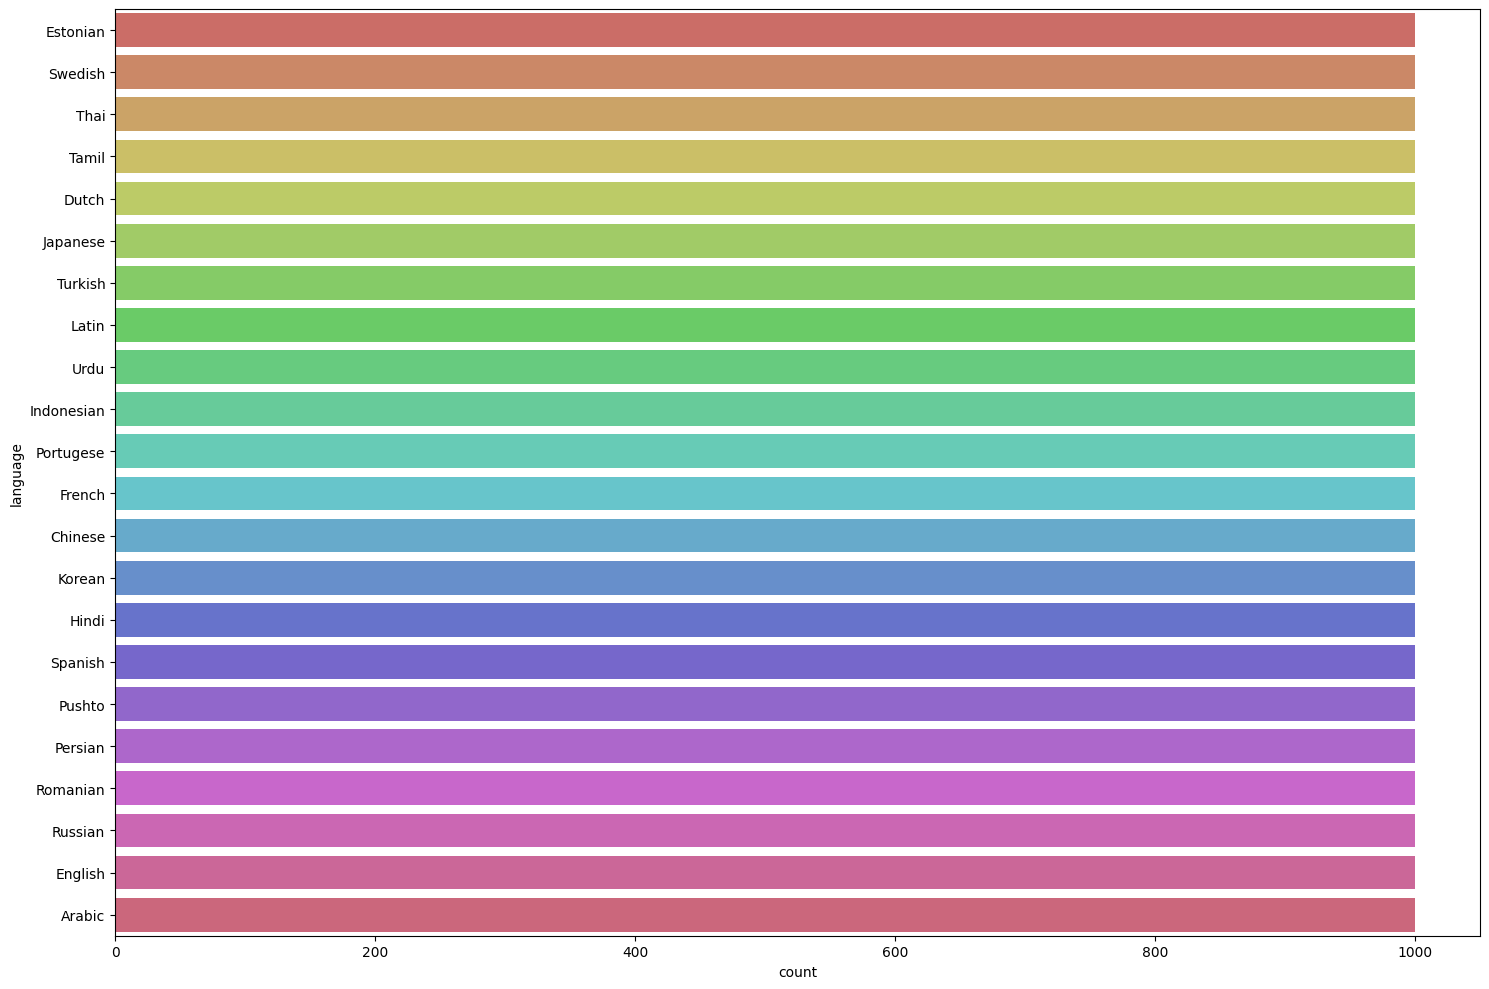

In [11]:
plt.figure(figsize=(15, 10))  # Increase height for better spacing
sns.countplot(y=data['language'], palette='hls')  # Change x to y for horizontal bars

# Rotate the y-axis labels and adjust their spacing
plt.yticks(rotation=0, ha='right')

# Adjust the layout to give more space between categories
plt.tight_layout()

plt.show()

In [12]:
# Group by 'language' and list text entries
grouped = data.groupby('language')['Text'].apply(list).reset_index()

print(grouped)


      language                                               Text
0       Arabic  [قبل عام بالضبط وبتاريخ  أعلن البغدادي خطة هدم...
1      Chinese  [胡赛尼本人和小说的主人公阿米尔一样，都是出生在阿富汗首都喀布尔，少年时代便离开了这个国家。...
2        Dutch  [de spons behoort tot het geslacht haliclona e...
3      English  [in  johnson was awarded an american institute...
4     Estonian  [klement gottwaldi surnukeha palsameeriti ning...
5       French  [association de recherche et de sauvegarde de ...
6        Hindi  [महाराष्ट्र  मई  को भारत का राज्य बनाया गया था...
7   Indonesian  [kemunculan pertamanya adalah ketika mencium k...
8     Japanese  [エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと...
9       Korean  [한국에서 성씨가 사용되기 시작한 정확한 시기는 알 수 없으나 한자漢字 등 중국 문...
10       Latin  [müller mox figura centralis circulorum doctor...
11     Persian  [آهن ترکیباتی را ایجاد می‌کند که عمدتاً در حال...
12   Portugese  [barocco pt escândalo de ª página é um filme f...
13      Pushto  [لویي په کالونیو کې د ظلم کولو خلاف وو او له خ...
14    Roma

In [13]:
data.dtypes

Text        object
language    object
dtype: object

In [14]:
x =  np.array(data['Text'])
y = np.array(data['language'])

In [15]:
print(x)

['klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald'
 'sebes joseph pereira thomas  på eng the jesuits and the sino-russian treaty of nerchinsk  the diary of thomas pereira bibliotheca instituti historici s i --   rome libris '
 'ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม'
 ...
 'con motivo de la celebración del septuagésimoquinto ° aniversario de la fundación del departamento en  guillermo ceballos espinosa presentó a la gobernación de caldas por encargo de su titular dilia estrada de gómez el h

In [16]:
print(y)

['Estonian' 'Swedish' 'Thai' ... 'Spanish' 'Chinese' 'Romanian']


In [17]:
cv = CountVectorizer()

X = cv.fit_transform(x)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [19]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 613529 stored elements and shape (14740, 277720)>
  Coords	Values
  (0, 197295)	2
  (0, 197708)	1
  (0, 197801)	1
  (0, 198388)	1
  (0, 197467)	1
  (0, 197865)	2
  (0, 197604)	1
  (0, 198428)	1
  (0, 198501)	1
  (0, 198556)	1
  (0, 197332)	1
  (0, 197485)	2
  (0, 198123)	1
  (0, 197892)	1
  (0, 197990)	1
  (0, 198053)	1
  (0, 198417)	1
  (0, 197623)	1
  (1, 197641)	2
  (1, 197314)	1
  (1, 197931)	1
  (1, 197804)	3
  (1, 198397)	1
  (1, 197149)	1
  (1, 197781)	1
  :	:
  (14738, 188817)	1
  (14738, 192004)	1
  (14738, 157171)	1
  (14738, 190346)	1
  (14738, 190725)	1
  (14738, 189685)	1
  (14738, 159269)	2
  (14738, 145431)	1
  (14738, 173292)	1
  (14738, 176062)	1
  (14738, 159959)	1
  (14738, 190198)	1
  (14738, 167124)	1
  (14738, 168158)	1
  (14738, 180260)	2
  (14738, 153262)	1
  (14738, 162150)	1
  (14738, 153355)	1
  (14738, 178104)	1
  (14738, 163770)	1
  (14739, 223002)	1
  (14739, 235170)	1
  (14739, 222446)	1
  (14739

In [20]:
data.shape

(22000, 2)

In [21]:
y_test.shape

(7260,)

In [22]:
model = MultinomialNB()

In [23]:

model.fit(X_train, y_train)

MultinomialNB()

In [24]:
model.score(X_test,y_test)

0.953168044077135

In [29]:
user = input("Enter a text")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

['Hindi']
